<a href="https://colab.research.google.com/github/SAnand2903/YouTube-Analysis/blob/main/BA820_Project_Group4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\textbf{Clickbait or Connection? Cracking the Code of Likes on YouTube's Trending Page}$

Team 04: Atharva Lokhande, Pritam Pandit, Rishabh Anand, Saumya Anand

## Table of Contents

1. Problem Definition
2. Executive Summary
3. Motivation
4. Business Relevance
5. Data Source

   5.1 Data Dictionary
   
6. Data cleaning and preparation
7. Exploratory Data Analysis
8. Clustering

   8.1 K- Means Clustering

   8.2 Hierarchical Clustering
   
9. Natural Language Processing
10. Citations

## Problem Definition

The problem that we are trying to solve focuses on analyzing user interaction with YouTube trending
videos and what marks the trends apart from the most apparent factor, the channel size. We aim to utilize
metrics such as the number of views per video, likes/dislikes per video, comment count, tags (content
category relevance), and the demographics of the publisher and recommend expansive strategies for
YouTube content creators.

## Executive Summary

The analysis of YouTube video data reveals several key insights. Great Britain (UK) and the United States lead in video publication. High outliers were observed in views and likes. 35,000 videos have English-only titles. Most video titles are Neutral, followed by Positive. There's weak correlation between title length and views. Strong correlation exists between views and likes (0.78), while weaker correlations were found with comment count (0.37) and dislikes (0.27). KMeans clustering identified 2 optimal clusters, supported by both the Elbow Plot and the Silhouette Plot. Similarly, Hierarchical Clustering also identified 2 as the optimal number of clusters, according to the Silhouette Plot. These findings provide valuable insights into YouTube video trends and viewer engagement metrics.

## Motivation

In today's booming YouTube landscape, where 122 million daily users tune in for everything from cat
videos to career-building content, understanding what makes videos truly go viral is no longer just about
entertainment – it's about unlocking immense potential. We can move beyond channel size by analyzing
user interaction with trending videos and delving into the deeper metrics that drive likes. This project isn't
just about cute animal compilations; it's about empowering businesses to connect with their audience,
creators to understand what resonates, and platforms to curate recommendations and combat
manipulation. Ultimately, it's about harnessing the power of YouTube to not only captivate viewers but
also build careers, foster communities, and pave the way for a new wave of online success.

## Data Source

The dataset is from Kaggle: https://www.kaggle.com/datasets/thedevastator/youtube-trending-videos-dataset and the corresponding source is https://data.world/iamdilan.

###Data Dictionary

| Attribute               |Data | Description                                         |
|-------------------------|-----------|-----------------------------------------------------|
| trending_date           | Date      | The date when the video became trending on YouTube. |
| title                   | Text      | The title of the video.                             |
| channel_title           | Text      | The title of the YouTube channel that published the video. |
| publish_date            | Date      | The date when the video was published on YouTube.   |
| time_frame              | Text      | The duration of time the video has been trending on YouTube. |
| published_day_of_week   | Text      | The day of the week when the video was published.   |
| publish_country         | Text      | The country where the video was published.          |
| tags                    | Text      | The tags or keywords associated with the video.     |
| views                   | Numeric   | The number of views the video has received.         |
| likes                   | Numeric   | The number of likes the video has received.         |
| dislikes                | Numeric   | The number of dislikes the video has received.      |
| comment_count           | Numeric   | The number of comments the video has received.      |
| comments_disabled       | Boolean   | Indicates whether comments are disabled for the video. |
| ratings_disabled        | Boolean   | Indicates whether ratings are disabled for the video.  |

## Business Relevance

YouTube isn't just cat videos anymore. With 122 million daily users, businesses are flocking to connect
with customers, while creators build careers from vlogs to tutorials. But what makes videos truly go viral?
This project ditches the fluff and analyzes what gets users to "like" beyond just channel size, be it targeted
ads, smarter creators, or thriving platforms. By employing machine learning tools, we aim to understand
how a business can thrive and excel on this platform and expand their customer base in an efficient
manner. We also want to propagate effective and ethical business expansion techniques that millions of
users can utilize to multiply their earnings using this platform.

## Data Cleaning and Preparation

In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=ac2daf445613b377bf73f472ab5fd6a94e11fdcf50371eb6440be16f0043af14
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 5.5 MB/s eta 0:00:00


In [ ]:
# Importing necessary libraries
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Dataset url
url='https://raw.githubusercontent.com/SAnand2903/BA830/main/Data/youtube.csv'

In [ ]:
# Reading the file
df=pd.read_csv(url)

In [ ]:
# Exploring the initial few entries
df.head(5)

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False


In [ ]:
df.shape

(161470, 18)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,161470.0,8.073450e+04,4.661252e+04,0.0,40367.25,80734.5,121101.75,161469.0
category_id,161470.0,1.946115e+01,7.432001e+00,1.0,15.00,23.0,24.00,44.0
views,161470.0,2.419854e+06,1.043749e+07,223.0,101538.25,384739.5,1339528.00,424538912.0
likes,161470.0,6.566194e+04,2.260617e+05,0.0,1975.00,9840.0,40062.75,5613827.0
dislikes,161470.0,3.490153e+03,3.114779e+04,0.0,85.00,348.0,1350.00,1944971.0
comment_count,161470.0,7.035494e+03,3.404121e+04,0.0,279.00,1144.0,4144.75,1626501.0


In [ ]:
# Exploring null values, if any
df.isna().sum()

index                     0
video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_date              0
time_frame                0
published_day_of_week     0
publish_country           0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

In [ ]:
# Dropping columns video ID and index
df.drop(columns=['video_id', 'index'], inplace=True)

In [ ]:
# Convert the date column to datetime format
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%d/%m/%Y')

In [ ]:
# Looking at the entries that belong to Canada
df.groupby('publish_country').get_group('CANADA')

,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
120589,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10,17:00 to 17:59,Friday,CANADA,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,False
120590,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13,17:00 to 17:59,Monday,CANADA,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,False
120591,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:00 to 19:59,Sunday,CANADA,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False
120592,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:00 to 18:59,Sunday,CANADA,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False
120593,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09,11:00 to 11:59,Thursday,CANADA,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161465,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13,18:00 to 18:59,Wednesday,CANADA,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,False,False,False
161466,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13,19:00 to 19:59,Wednesday,CANADA,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,False,False,False
161467,18.14.06,KINGDOM HEARTS III â€“ SQUARE ENIX E3 SHOWCASE...,Kingdom Hearts,20,2018-06-11,17:00 to 17:59,Monday,CANADA,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,False,False,False
161468,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13,4:00 to 4:59,Wednesday,CANADA,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,False,False,False


In [ ]:
# Using regex to only keep English titled values in the dataset and saving it in english_text_df
import re
def is_english(text):
    # Regular expression to match only English text
    return bool(re.match(r'^[a-zA-Z\s.,!?-]+$', text))

# Filter the DataFrame to include only English text
english_text_df = df[df['title'].apply(is_english)]

In [ ]:
# Looking at the initial few entries of the enw dataset
english_text_df.head(5)

,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
13,17.14.11,Which Countries Are About To Collapse?,NowThis World,25,2017-11-12,14:00 to 14:59,Sunday,US,"nowthis|""nowthis world""""|""""world news""""|""""nowt...",544770,7848,1171,3981,False,False,False
14,17.14.11,SHOPPING FOR NEW FISH!!!,The king of DIY,15,2017-11-12,18:00 to 18:59,Sunday,US,"shopping for new fish|""new fish""""|""""aquarium f...",207532,7473,246,2120,False,False,False
15,17.14.11,The New SpotMini,BostonDynamics,28,2017-11-13,20:00 to 20:59,Monday,US,"Robots|""Boston Dynamics""""|""""SpotMini""""|""""Legge...",75752,9419,52,1230,False,False,False
16,17.14.11,One Change That Would Make Pacific Rim a Classic,Cracked,23,2017-11-12,17:00 to 17:59,Sunday,US,"pacific rim|""pacific rim 2""""|""""pacific rim seq...",295639,8011,638,1256,False,False,False


In [ ]:
# Looking at the shape of the new datatset
english_text_df.shape

(35225, 16)

In [ ]:
english_text_df

,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
13,17.14.11,Which Countries Are About To Collapse?,NowThis World,25,2017-11-12,14:00 to 14:59,Sunday,US,"nowthis,nowthis world,world news,nowthis news,...",544770,7848,1171,3981,False,False,False
14,17.14.11,SHOPPING FOR NEW FISH!!!,The king of DIY,15,2017-11-12,18:00 to 18:59,Sunday,US,"shopping for new fish,new fish,aquarium fish,a...",207532,7473,246,2120,False,False,False
15,17.14.11,The New SpotMini,BostonDynamics,28,2017-11-13,20:00 to 20:59,Monday,US,"Robots,Boston Dynamics,SpotMini,Legged Locomot...",75752,9419,52,1230,False,False,False
16,17.14.11,One Change That Would Make Pacific Rim a Classic,Cracked,23,2017-11-12,17:00 to 17:59,Sunday,US,"pacific rim,pacific rim 2,pacific rim sequel,G...",295639,8011,638,1256,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161442,18.14.06,The Most Insane Laptop Ever Built...,Unbox Therapy,28,2018-06-13,17:00 to 17:59,Wednesday,CANADA,"acer predator,acer predator 21x,predator 21x,2...",950727,38129,926,4213,False,False,False
161451,18.14.06,TactiCOOL RELOADS,Corridor,24,2018-06-13,20:00 to 20:59,Wednesday,CANADA,"matrix,action,action comedy,funny,best moments...",345870,36481,230,2082,False,False,False
161459,18.14.06,Ridiculous Actor Demands That Forced Movie Det...,Looper,24,2018-06-12,14:00 to 14:59,Tuesday,CANADA,"actor,actors,actor demands,ridiculous actor,ri...",362153,5568,173,680,False,False,False
161460,18.14.06,Ultimate Safari Adventure!,Brave Wilderness,15,2018-06-13,11:00 to 11:59,Wednesday,CANADA,"wild,minecraft ocelot,ocelot minecraft,adventu...",182184,9710,128,1647,False,False,False


## Exploratory Data Analysis

Before plunging into the technical analysis of the dataset to derive insights, we would prefer to get an overview of the different factors play in this dataset.

First, we would like to analyze how `likes` behave during different timelines.

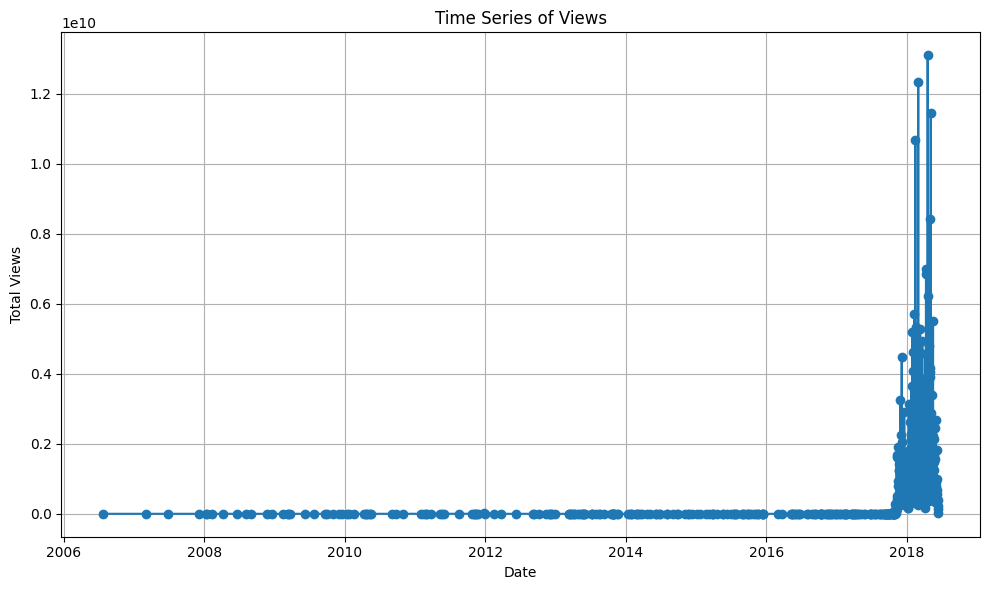

In [ ]:
# Groupping by publish_date and sum the views for each date
views_by_date = df.groupby('publish_date')['views'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(views_by_date.index, views_by_date.values, marker='o', linestyle='-')
plt.title('Time Series of Views')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.grid(True)
plt.tight_layout()
plt.show()

From the above plot, it can be seen that there is a substantial increase in the number of views in 2017-2018, as compared to 2006-2016. It could be said that was due to the heightened craze amongst people to use YouTube as an alternate source of income.

This particular tidbit of information is definitely worth looking into and therefore, we would like to make a timeseries plot that looks into the number of total views in different months on 2018 to see if the number of views were consistent throught the year.

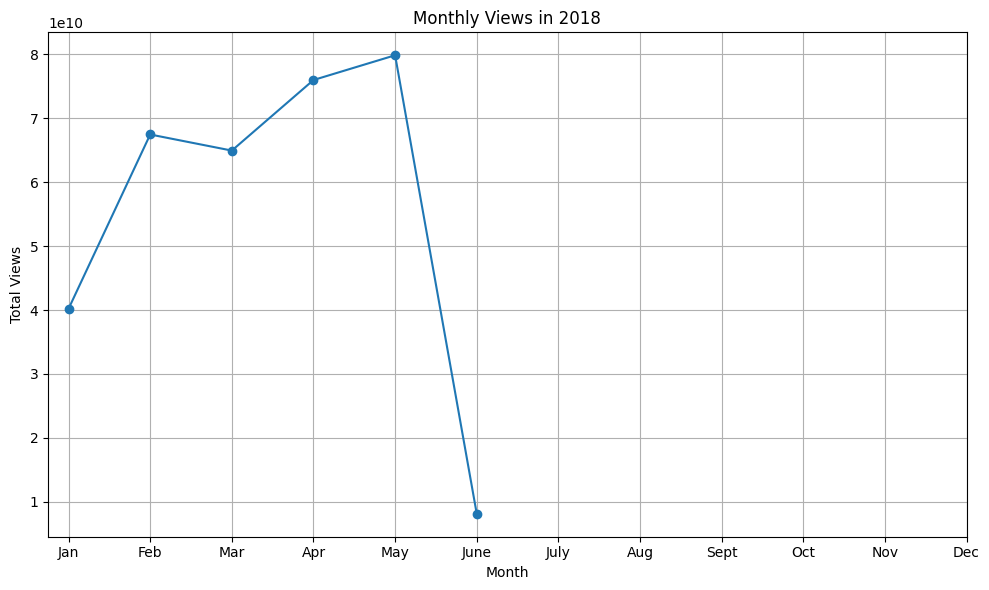

In [ ]:
# Filter the DataFrame to include only the data for the year 2018
df_2018 = df[df['publish_date'].dt.year == 2018]

# Group by month and sum the views for each month
views_by_month = df_2018.groupby(df_2018['publish_date'].dt.month)['views'].sum()

# Plotting
plt.figure(figsize=(10, 6))
views_by_month.plot(kind='line', marker='o', linestyle='-')
plt.title('Monthly Views in 2018')
plt.xlabel('Month')
plt.ylabel('Total Views')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

From the above plot we can see that there hasn't been a consistent 'popularity' in terms of views, throughtout 2018. The beginning of 2018 definitely saw a huge spike in the total number of views but that dulled down towards the end of 2018.

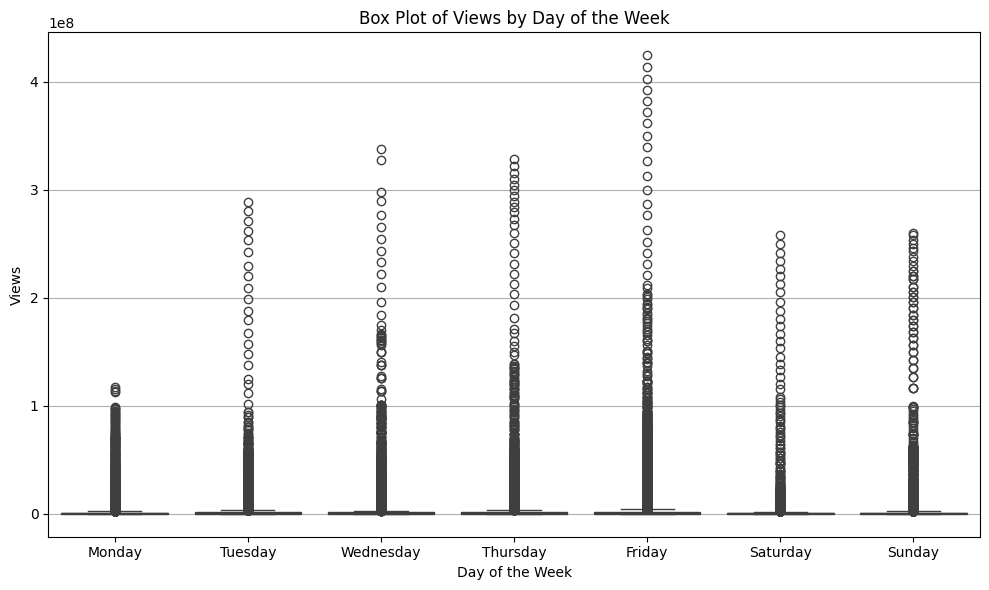

In [ ]:
# Comparing days of the week with views
plt.figure(figsize=(10, 6))
sns.boxplot(x='published_day_of_week', y='views', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Box Plot of Views by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Views')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

From the above plot it can be seen that the maximum number of views were on Friday.

Another aspect that can be analyzed is to see if the country and the number of videos posted are somehow interrelated.

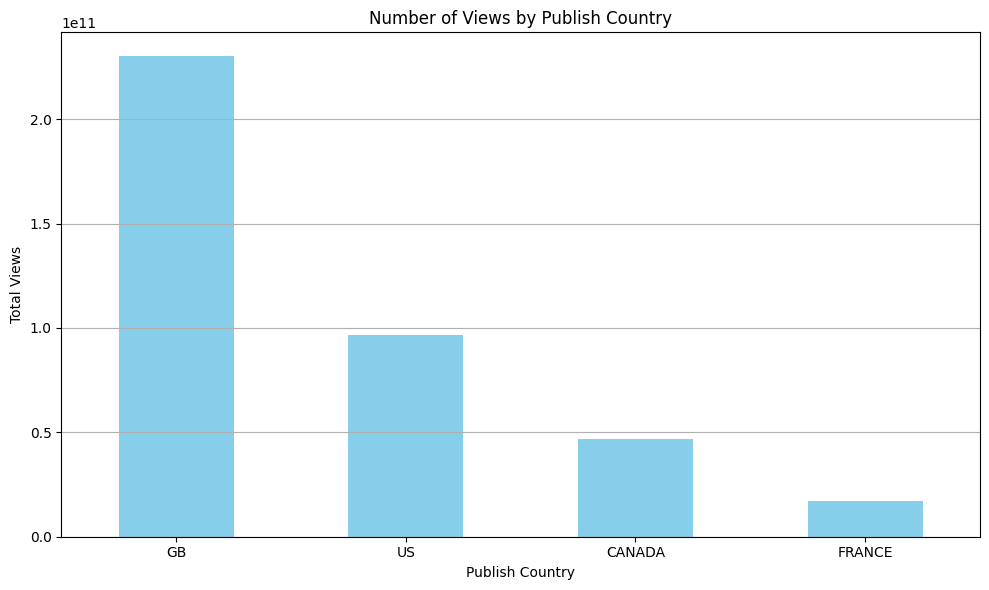

In [ ]:
# Group by publish_country and calculate the total views for each country
views_by_country = df.groupby('publish_country')['views'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
views_by_country.plot(kind='bar', color='skyblue')
plt.title('Number of Views by Publish Country')
plt.xlabel('Publish Country')
plt.ylabel('Total Views')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

It can be seen that the videos published in United Kingdom have the most views followed by the USA.

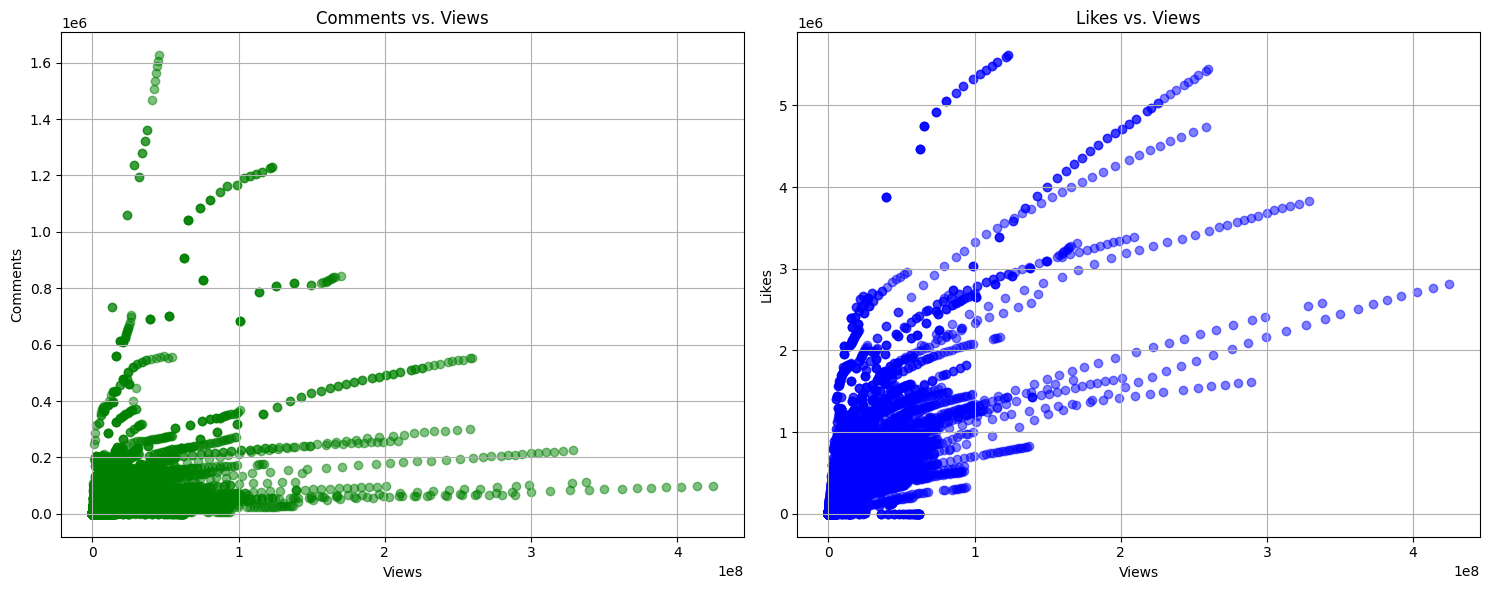

In [ ]:
# Comparing likes and comments with the number of views
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot of Comments vs. Views
axes[0].scatter(df['views'], df['comment_count'], alpha=0.5, color='green')
axes[0].set_title('Comments vs. Views')
axes[0].set_xlabel('Views')
axes[0].set_ylabel('Comments')
axes[0].grid(True)

# Scatter plot of Likes vs. Views
axes[1].scatter(df['views'], df['likes'], alpha=0.5, color='blue')
axes[1].set_title('Likes vs. Views')
axes[1].set_xlabel('Views')
axes[1].set_ylabel('Likes')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

Based on the plot shown above, a comparative analysis was carried out to assess comments and likes relative to views, indicating a parallel performance between these metrics. Moreover, it was noted that as view counts rise, there is typically a corresponding increase in the number of likes.

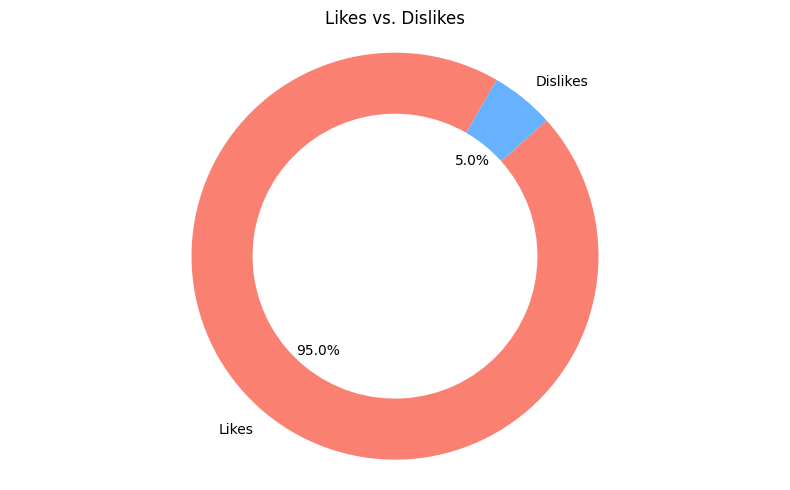

In [ ]:
# Calculate the total likes and dislikes
total_likes = df['likes'].sum()
total_dislikes = df['dislikes'].sum()

# Data for the donut chart
labels = ['Likes', 'Dislikes']
sizes = [total_likes, total_dislikes]

# Define colors
colors = ['#FA8072', '#66B2FF']

# Plotting
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=60, wedgeprops=dict(width=0.3))
plt.title('Likes vs. Dislikes')
plt.axis('equal')
plt.tight_layout()
plt.show()


From the above plot, it can be seen that out of the total videos viewed 95% of them have been liked, whereas only 5% of them were disliked.

## Clustering

Initially, for clustering, consider the numerical features- `views`, `likes`, `comments count`, `category Id` and `dislikes` as the main features.

In [ ]:
# Extract the required features
features = english_text_df[['views', 'likes', 'comment_count', 'category_id','dislikes']]

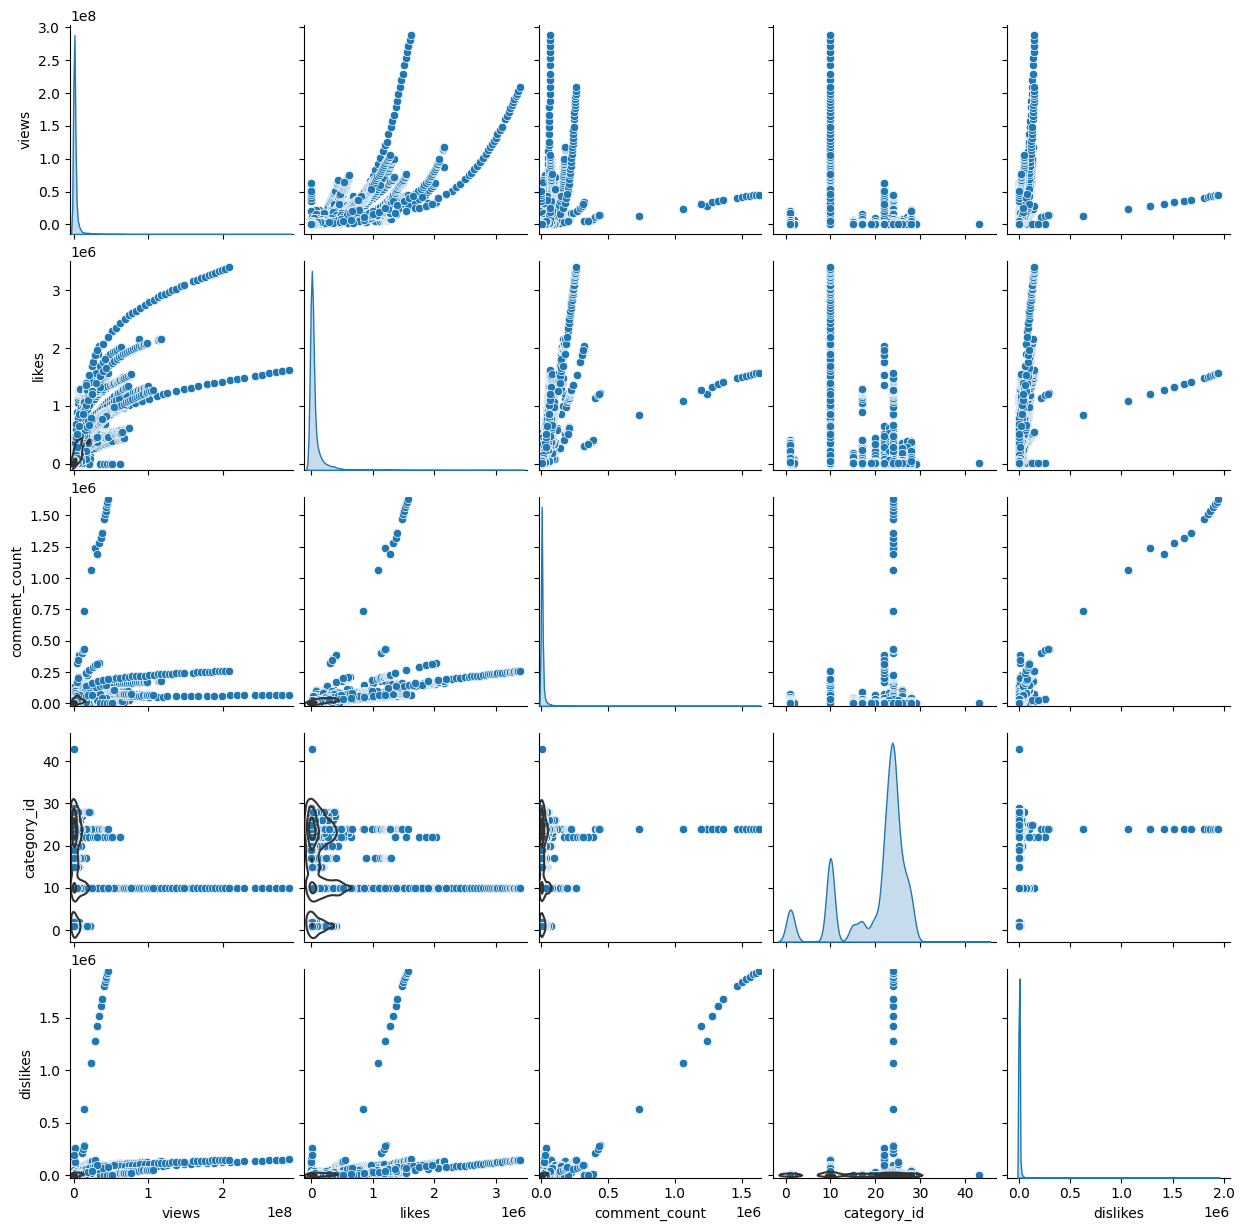

In [ ]:
g = sns.pairplot(features[['views', 'likes', 'comment_count', 'category_id','dislikes']], diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

*Trend Analysis*

*   There seems to be a positive correlation between `views` and `likes`, which is expected as more `views` could lead to more `likes`.
*   The relationships between `views` and `comments`, `likes` and `comments`, and `dislikes` and `comments` seem to be positively correlated as well.

*   The plots show several points that are far away from the main clusters, indicating potential outliers. For example, there are videos with a disproportionately high number of likes compared to views.

In [ ]:
# Specify number of clusters
num_clusters = 2

In [ ]:
# To standerdize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
normalized_data = sc.fit_transform(features)
normalized_data = pd.DataFrame(normalized_data, columns=features.columns)
normalized_data.head()

,views,likes,comment_count,category_id,dislikes
0,-0.183745,-0.079388,0.206351,0.256529,-0.026591
1,-0.204939,-0.318997,-0.107229,0.672136,-0.071731
2,-0.240044,-0.320806,-0.155969,-0.713218,-0.094993
3,-0.253762,-0.311420,-0.179279,1.087742,-0.099872
4,-0.230872,-0.318211,-0.178598,0.395065,-0.085135


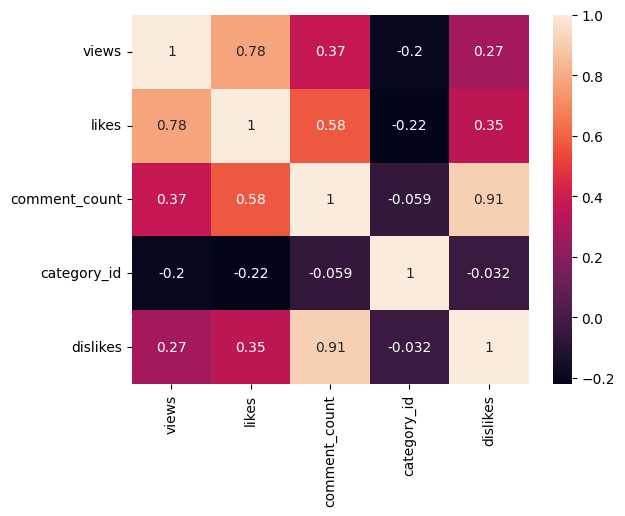

In [ ]:
# Plotting heatmap
import seaborn as sns
sns.heatmap(normalized_data.corr(), annot=True);

*Correlation Matrix*


*   *Views*- Highly Correlated with likes(0.78),comment_count(0.37)dislikes(0.27) and negatively correlated with category_id(-0.2).

*   *Likes*-Highly Correlated with views(0.78),comment_count(0.58)dislikes(0.35) and negatively correlated with category_id(-0.22).

*   *comment_count*-Highly Correlated with views(0.37),likest(0.58)dislikes(0.91) and negatively correlated with category_id(-0.059).

*   *category_id*-Negatively correlated with likes(-0.22),comment_count(-0.059),and dislikes(-0.032).

*   *dislikes*-Negatively correlated with category_id(-0.032),comment_count(0.91),and likes(0.35) and views(0.27).

*Inference*

Dislikes and Comment_count have the highest correlation(0.91)

###KMeans Clustering


In [ ]:
# Performing Kmeans
from sklearn.cluster import KMeans

num_clusters = 5
kmeans_result = KMeans(num_clusters, init = 'random', random_state=42,n_init=10).fit(normalized_data)

In [ ]:
# Looking at the cluster centers
kmeans_result.cluster_centers_

array([[ 1.23900925e+01,  1.00871215e+01,  3.99512204e+00,
        -1.40589545e+00,  2.67513396e+00],
       [-4.90151469e-03,  3.10505649e-02, -3.98684332e-02,
        -1.66449239e+00, -3.55256684e-02],
       [-1.54322863e-01, -1.78670207e-01, -9.12762330e-02,
         5.04006480e-01, -5.75013648e-02],
       [ 3.49393082e+00,  6.24793079e+00,  3.53594270e+01,
         5.33600234e-01,  4.00260522e+01],
       [ 3.21131652e+00,  3.86316958e+00,  1.88756256e+00,
        -1.08454391e+00,  8.73888066e-01]])

In [ ]:
# Looking at the cluster labels and including in the dataset
cluster_labels = kmeans_result.labels_
normalized_data['labels'] = cluster_labels
normalized_data

,views,likes,comment_count,category_id,dislikes,labels
0,-0.183745,-0.079388,0.206351,0.256529,-0.026591,2
1,-0.204939,-0.318997,-0.107229,0.672136,-0.071731,2
2,-0.240044,-0.320806,-0.155969,-0.713218,-0.094993,1
3,-0.253762,-0.311420,-0.179279,1.087742,-0.099872,2
4,-0.230872,-0.318211,-0.178598,0.395065,-0.085135,2
...,...,...,...,...,...,...
35220,-0.162680,-0.172947,-0.101152,1.087742,-0.077893,2
35221,-0.225644,-0.180896,-0.156965,0.533600,-0.095395,2
35222,-0.223949,-0.329994,-0.193684,0.533600,-0.096829,2
35223,-0.242683,-0.310016,-0.168357,-0.713218,-0.097960,1


In [ ]:
# Getting the label counts
normalized_data['labels'].value_counts()

2    26772
1     7454
4      876
0      104
3       19
Name: labels, dtype: int64

As views, likes and comment_count have highest correlation among each other. Plotted a Plotly Scatter 3D plot.

In [ ]:
# Plotting 3d scatter plot
import plotly.express as px

fig = px.scatter_3d(normalized_data, x='views', y='likes', z='comment_count',color = 'labels')
fig.update_traces(marker_size = 3)
fig.show()

$\textbf{Finding the optimal number of Clusters - Elbow Plot}$

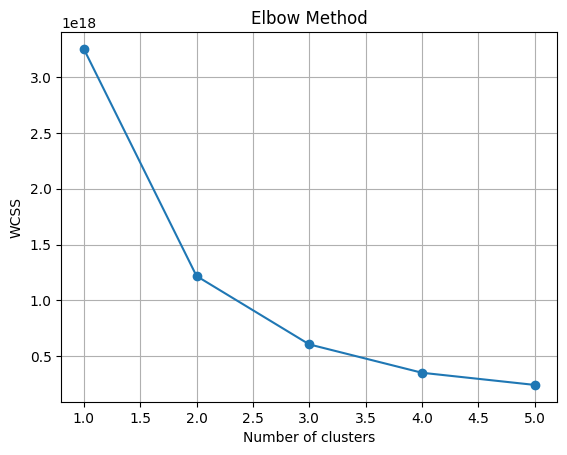

In [ ]:
# Plotting elbow plot to get the optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

max_clusters = 5
wcss = []

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=12, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.grid(True)
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

*Inference*

As the Elbow in the plot above shows optimal cluster at 2.

<Axes: xlabel='num_clusters', ylabel='distortions'>

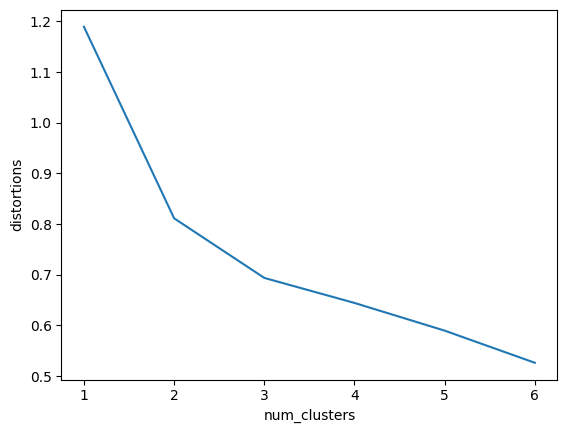

In [ ]:
from scipy.cluster.vq import kmeans
import seaborn as sns
k_means_optimal=normalized_data.copy()
k_means_optimal = k_means_optimal[['views', 'likes', 'comment_count', 'category_id','dislikes']]

distortions = []
num_clusters = range(1, 7)

for i in num_clusters:
    cluster_centers, distortion = kmeans(k_means_optimal, i)
    distortions.append(distortion)

elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)

*Inference*

Plotted num_clusters along with distortions and here as well the optimal is 2.

$\textbf{Determine optimal k using the silhouette method}$

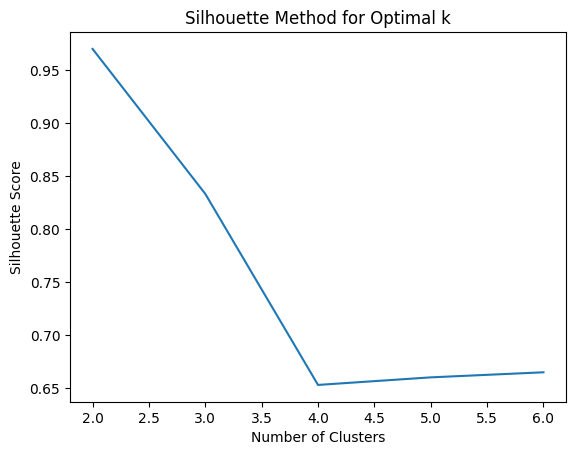

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
X = k_means_optimal
silhouette_scores = []
range_values = range(2, 7)

for i in range_values:
    kmeans = KMeans(n_clusters=i,n_init=10).fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels, metric='euclidean'))

plt.plot(range_values, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

*Inference*

Using Silhouette method ,we find the highest silhouette score above(0.95) for 2 num_clusters.Here again we find optimal cluster to be 2.

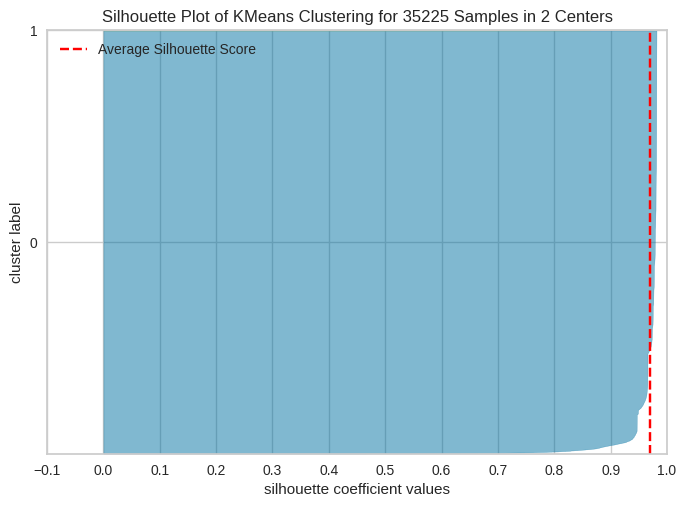

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 35225 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Silhouette Score plot
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

optimal_k = 2
model = KMeans(n_clusters=optimal_k, random_state=42,n_init=10)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

*Inference*

Silhouette Plot of KMeans Clustering for 35225 samples gathered for 2 Centres.

###Hierarchical Clustering

In [ ]:
# Performing Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, fcluster
df_hierarchy = normalized_data.copy()
df_hierarchy

,views,likes,comment_count,category_id,dislikes,labels
0,-0.183745,-0.079388,0.206351,0.256529,-0.026591,2
1,-0.204939,-0.318997,-0.107229,0.672136,-0.071731,2
2,-0.240044,-0.320806,-0.155969,-0.713218,-0.094993,1
3,-0.253762,-0.311420,-0.179279,1.087742,-0.099872,2
4,-0.230872,-0.318211,-0.178598,0.395065,-0.085135,2
...,...,...,...,...,...,...
35220,-0.162680,-0.172947,-0.101152,1.087742,-0.077893,2
35221,-0.225644,-0.180896,-0.156965,0.533600,-0.095395,2
35222,-0.223949,-0.329994,-0.193684,0.533600,-0.096829,2
35223,-0.242683,-0.310016,-0.168357,-0.713218,-0.097960,1


In [ ]:
# Performing Linkage on total dataset features
from scipy.cluster.hierarchy import linkage, fcluster


Z = linkage(df_hierarchy, method='ward')

The dendrogram shows how each point in the dataset is merged with others to form clusters. Each merge is represented by a horizontal line. The vertical lines are not data points themselves, but rather they represent the distance (or dissimilarity) between clusters. The longer the vertical line, the greater the distance between the clusters.

<Figure size 1500x1000 with 0 Axes>

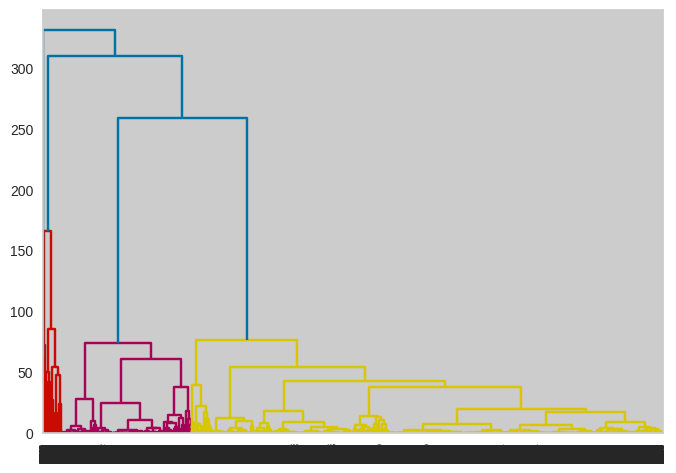

<Figure size 1500x1000 with 0 Axes>

In [ ]:
# Dendrogram plotting
from scipy.cluster.hierarchy import dendrogram

_ = dendrogram(Z)
plt.figure(figsize=(15, 10))

In [ ]:
# Computing Silhouette Score for all the clusters
num_clusters = range(2, 6)
silhouette_scores = []

for n_clusters in num_clusters:
    labels = fcluster(Z, n_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(df_hierarchy, labels)
    silhouette_scores.append(silhouette_avg)
    print('Silhouette Score for', n_clusters, 'clusters is:', silhouette_avg)

Silhouette Score for 2 clusters is: 0.9667488389393668
Silhouette Score for 3 clusters is: 0.8153241221496483
Silhouette Score for 4 clusters is: 0.6924360615132763
Silhouette Score for 5 clusters is: 0.6963525570924155


*Inference*

* The Silhouette Score for 2 clusters is: 0.9667488389393668

* The Silhouette Score for 3 clusters is: 0.8153241221496483

* The Silhouette Score for 4 clusters is: 0.6924360615132763

* The Silhouette Score for 5 clusters is: 0.6963525570924155

In [ ]:
# Finding the optimal number of clusters
optimal_num_clusters = num_clusters[silhouette_scores.index(max(silhouette_scores))]
print('Optimal Number of Clusters:', optimal_num_clusters)

Optimal Number of Clusters: 2


*Inference*

Optimal Number of Clusters: 2

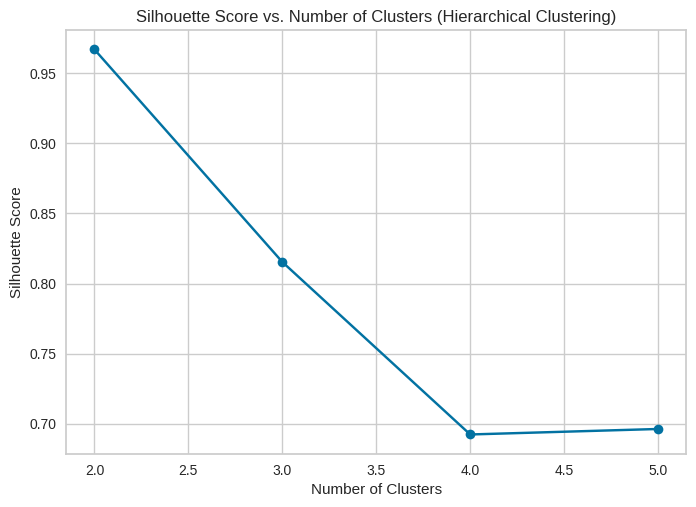

In [ ]:
# Plotting the silhouette score and the number of clusters
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (Hierarchical Clustering)')
plt.show()

*Inference*

The Silhouette score  for num of clusters :2 is greater than 0.95

##Natural Language Processing

Let us see if we have any sentiment words in the titles?

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

SIA = SentimentIntensityAnalyzer()

def sentiment_score(text):
  sentiment_scores = SIA.polarity_scores(text)
  if sentiment_scores['compound'] >= 0.05:
    return 'Positive'
  elif sentiment_scores['compound'] <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

# Use .loc to assign values to the 'Sentiment' column
english_text_df.loc[:, 'Sentiment'] = english_text_df['title'].apply(sentiment_score)


<ipython-input-42-71bb200ed831>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X = english_text_df['Sentiment'].value_counts()

In [ ]:
import plotly.express as px

fig = px.bar(x=X.index, y=X, title='Youtube Video Title Sentiment Count', labels={'x': 'Number of titles', 'y': 'Title Sentiment'})

fig.show()

By plotting the bar graph of sentiment lable, we observe that the majority label is Neutral followed by positive.

Let's see if we can find any correlation with the title text lenght and video views

In [ ]:
english_text_df.loc[:, 'title_length'] = english_text_df['title'].str.len()


<ipython-input-45-e7cc76473249>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.express as px

fig = px.scatter(x = english_text_df['title_length'],
                 y = english_text_df['views'] ,
                 title = "Video Title Length vs Video views",
                 labels = {'x': 'Video Title Length', 'y':'Video views'})

fig.show()

The lenght of video title string are more segregated between 20-40. We find little to no correlation between video title length and video views.

Let's try to plot word cloud to see mostly used word in video title.

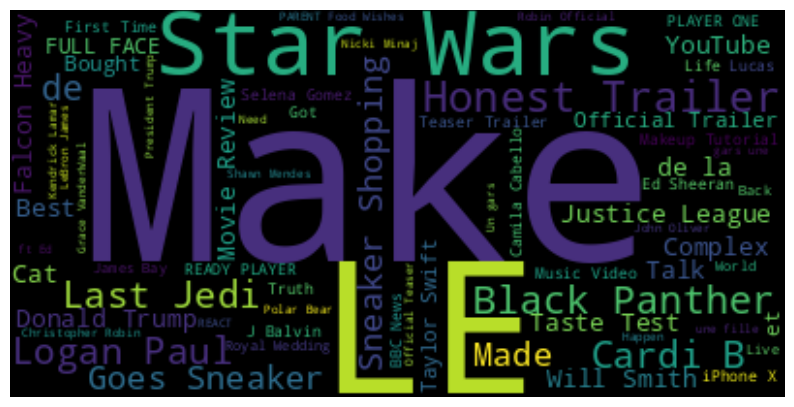

In [ ]:
from wordcloud import WordCloud
text = ' '.join(english_text_df['title'])
wordcloud = WordCloud().generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We see Movie names like Star Wars, Black Panther and Make as highest utilised word implying "How to" Videos

#TOKENIZATION AND CLUSTERING

In [ ]:
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

english_text_df["text_prcessed"] = english_text_df["title"].str.lower()
english_text_df["text_prcessed"] = english_text_df["title"].replace('<br />', ' ', regex=True)
english_text_df["text_prcessed"] = english_text_df["title"].replace('[^\w\d\s]', ' ', regex=True)

tokenized_reviews = [word_tokenize(review) for review in english_text_df["title"]]
stop_words = set(stopwords.words('english'))

for indx, tokens in enumerate(tokenized_reviews):
  tokenized_reviews[indx] = [word for word in tokens if word not in stop_words]

english_text_df["tokenized"] = tokenized_reviews
tokenized_reviews

#Count Vectorize

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit(english_text_df['text_prcessed'])

print('Number of tokens:', len(cv.vocabulary_))
print('Vocabulary:', cv.vocabulary_)

In [ ]:
cv.get_stop_words()

In [ ]:
dtm = cv.transform(english_text_df['text_prcessed'])
bow = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
bow

In [ ]:

recognized_tokens_sentence0 = cv.inverse_transform([bow.iloc[0]])
recognized_tokens_sentence0

In [ ]:
recognized_tokens_sentence1 = cv.inverse_transform([bow.iloc[1]])
recognized_tokens_sentence1

In [ ]:
recognized_tokens_sentence2= cv.inverse_transform([bow.iloc[2]])
recognized_tokens_sentence2

#Perform Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

# Cosine sim
cos_sim = pd.DataFrame(cosine_similarity(bow, bow))
cos_sim

#Perform TF IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_model = TfidfVectorizer(norm=None)
tfidf_model.fit(english_text_df['text_prcessed'])
df_tfidf_transformed = tfidf_model.transform(english_text_df['text_prcessed'])
tfidf_vectors = pd.DataFrame(df_tfidf_transformed.toarray(), columns=tfidf_model.get_feature_names_out())
tfidf_vectors

#Perform TSNE

In [ ]:
# Performing TSNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(tfidf_vectors)

#Using Elbow plot find the number of clusters

In [ ]:
from sklearn.cluster import KMeans
data_for_clustering = tsne_result

k_values = range(1, 15)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_for_clustering)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, 'bo-', markerfacecolor='red')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
sampled_tfidf_df = tfidf_vectors.sample(n=1000, random_state=42)

In [ ]:
normalised_features = normalized_data.sample(n=1000, random_state=42)

In [ ]:
tfidf_df_final1 = pd.concat([sampled_tfidf_df, normalised_features], axis=1)

In [ ]:
sampled_tfidf_df

#Run Kmeans Clustering


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

num_clusters = 3
km = KMeans(n_clusters=num_clusters, random_state=42)
clusters = km.fit_predict(tfidf_df_final1)
tfidf_df_final1['Cluster'] = clusters
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_df_final1.columns

for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :20]:
        print(f' {terms[ind]}')
    print()

Perform KMeans and Find TOP 20 words in each Cluster

In [ ]:
tfidf_df_final1

In [ ]:
df_cluster_0 = tfidf_df_final1[tfidf_df_final1['Cluster'] == 0]
df_cluster_1 = tfidf_df_final1[tfidf_df_final1['Cluster'] == 1]
df_cluster_2 = tfidf_df_final1[tfidf_df_final1['Cluster'] == 2]

Make three Clusters based on Cluster values 0,1,2

In [ ]:
import pandas as pd

cluster_0_df = pd.DataFrame(columns=["Term"])
cluster_1_df = pd.DataFrame(columns=["Term"])
cluster_3_df = pd.DataFrame(columns=["Term"])

# Extract terms for each cluster and populate the respective dataframes
for ind in order_centroids[0]:
    cluster_0_df = cluster_0_df.append({"Term": terms[ind]}, ignore_index=True)

for ind in order_centroids[1]:
    cluster_1_df = cluster_1_df.append({"Term": terms[ind]}, ignore_index=True)

for ind in order_centroids[2]:
    cluster_3_df = cluster_3_df.append({"Term": terms[ind]}, ignore_index=True)


print("Cluster 0:")
print(cluster_0_df)

print("\nCluster 1:")
print(cluster_1_df)

print("\nCluster 2:")
print(cluster_3_df)

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

warnings.resetwarnings()


#Make three lists of all the text terms in these Clusters

In [ ]:

terms_cluster_0 = list(cluster_0_df["Term"])
terms_cluster_1 = list(cluster_1_df["Term"])
terms_cluster_3 = list(cluster_3_df["Term"])

print("Terms in Cluster 0:")
print(terms_cluster_0)

print("\nTerms in Cluster 1:")
print(terms_cluster_1)

print("\nTerms in Cluster 2:")
print(terms_cluster_3)


#Cluster 0 Word Cloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(terms_cluster_0):

    text = ' '.join(map(str, terms_cluster_0))
    wordcloud = WordCloud().generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
generate_wordcloud(terms_cluster_0)

#Cluster 1 Word Cloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(terms_cluster_1):

    text = ' '.join(map(str, terms_cluster_1))
    wordcloud = WordCloud().generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
generate_wordcloud(terms_cluster_1)

#Cluster 2 Word Cloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(terms_cluster_3):

    text = ' '.join(map(str, terms_cluster_3))
    wordcloud = WordCloud().generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
generate_wordcloud(terms_cluster_3)

#Plot the TSNE Model with 3n components


In [ ]:
# Configure t-SNE with 3 components
tsne_model = TSNE(n_components=3, verbose=1, random_state=0, n_iter=251, perplexity=40)
tsne_tfidf_3d = tsne_model.fit_transform(tfidf_vectors)
tsne_tfidf_df_3d = pd.DataFrame(tsne_tfidf_3d, columns=['x', 'y', 'z'])
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_tfidf_df_3d['x'], tsne_tfidf_df_3d['y'], tsne_tfidf_df_3d['z'], alpha=0.5)
ax.set_xlabel('t-SNE feature 0')
ax.set_ylabel('t-SNE feature 1')
ax.set_zlabel('t-SNE feature 2')
plt.title('3D t-SNE representation of TF-IDF vectors')
plt.show()

#Find Inertia and Silhouette Score on the TF IDF vector

Reference -
https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html

In [ ]:
from sklearn.metrics import silhouette_score

def fit_and_evaluate(model, data, name):
    model.fit(data)

    inertia = model.inertia_
    print(f"{name} - Inertia: {inertia}")

    silhouette = silhouette_score(data, model.labels_)
    print(f"{name} - Silhouette Score: {silhouette}")

kmeans = KMeans(
    n_clusters=3,
    max_iter=100,
    n_init=5,
)

fit_and_evaluate(kmeans, tsne_tfidf_3d, name="KMeans on tf-idf vectors")


#Citations


*   Datacamp Modules and Assignments(K Means Clustering)
*   https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/
*   https://www.nltk.org/_modules/nltk/sentiment/vader.html
*   https://plotly.com/python/plotly-express/
